In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23541 entries, 0 to 23540
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         23541 non-null  int64  
 1   key                23541 non-null  object 
 2   fare_amount        23541 non-null  float64
 3   pickup_datetime    23541 non-null  object 
 4   pickup_longitude   23541 non-null  float64
 5   pickup_latitude    23541 non-null  float64
 6   dropoff_longitude  23541 non-null  float64
 7   dropoff_latitude   23541 non-null  float64
 8   passenger_count    23541 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.6+ MB


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23541.000000,23541.000000,23541.000000,23541.000000,23541.000000,23541.000000
mean,11.409535,-72.573550,39.945118,-72.562810,39.945338,1.679113
std,10.185199,11.211868,6.073262,10.245669,6.073208,1.299239
min,0.000000,-748.016667,-74.015515,-75.350437,-74.008745,0.000000
25%,6.000000,-73.992107,40.734978,-73.991550,40.733680,1.000000
50%,8.500000,-73.981836,40.752368,-73.980171,40.752822,1.000000
75%,12.500000,-73.967288,40.767175,-73.963479,40.768175,2.000000
max,350.000000,40.770667,45.031653,40.828377,45.031598,6.000000


In [ ]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
df['dropoff_longitude'].fillna(value= df['dropoff_longitude'].median(), inplace = True)
df['dropoff_latitude'].fillna(value= df['dropoff_latitude'].mean(), inplace = True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [ ]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['dayofweek'] = df.pickup_datetime.dt.dayofweek
df['hour'] = df.pickup_datetime.dt.hour

In [ ]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,4,8,1.661683
4,16.0,-73.930059,40.744085,-73.973082,40.761247,3.5,2014,8,3,17,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
23536,15.7,-73.989905,40.756353,-73.951373,40.791173,1.0,2011,2,4,8,5.051614
23537,13.3,-74.007172,40.739992,-73.959625,40.760545,3.0,2011,4,5,0,4.611375
23538,13.5,-73.970238,40.756088,-73.987312,40.744457,2.0,2015,2,3,10,1.934269
23539,5.7,-73.992387,40.745330,-73.983495,40.760617,2.0,2011,5,2,20,1.857540


In [ ]:
from math import *
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist= []
    for pos in range(len(longitude1)):
        long1,lat1,long2,lat2= map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long= long2- long1
        dist_lat= lat2- lat1
        a= sin(dist_lat/2)**2 + cos(lat1) * cos(lat2) * sin(dist_long/2)**2
        c= 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist

In [ ]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                          df['pickup_latitude'].to_numpy(),
                                          df['dropoff_longitude'].to_numpy(),
                                          df['dropoff_latitude'].to_numpy() )

In [ ]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


In [ ]:
df = df.drop('pickup_datetime', axis=1)

In [ ]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
year,"Axes(0.125,0.448049;0.352273x0.0939024)"
month,"Axes(0.547727,0.448049;0.352273x0.0939024)"
dayofweek,"Axes(0.125,0.335366;0.352273x0.0939024)"
hour,"Axes(0.547727,0.335366;0.352273x0.0939024)"


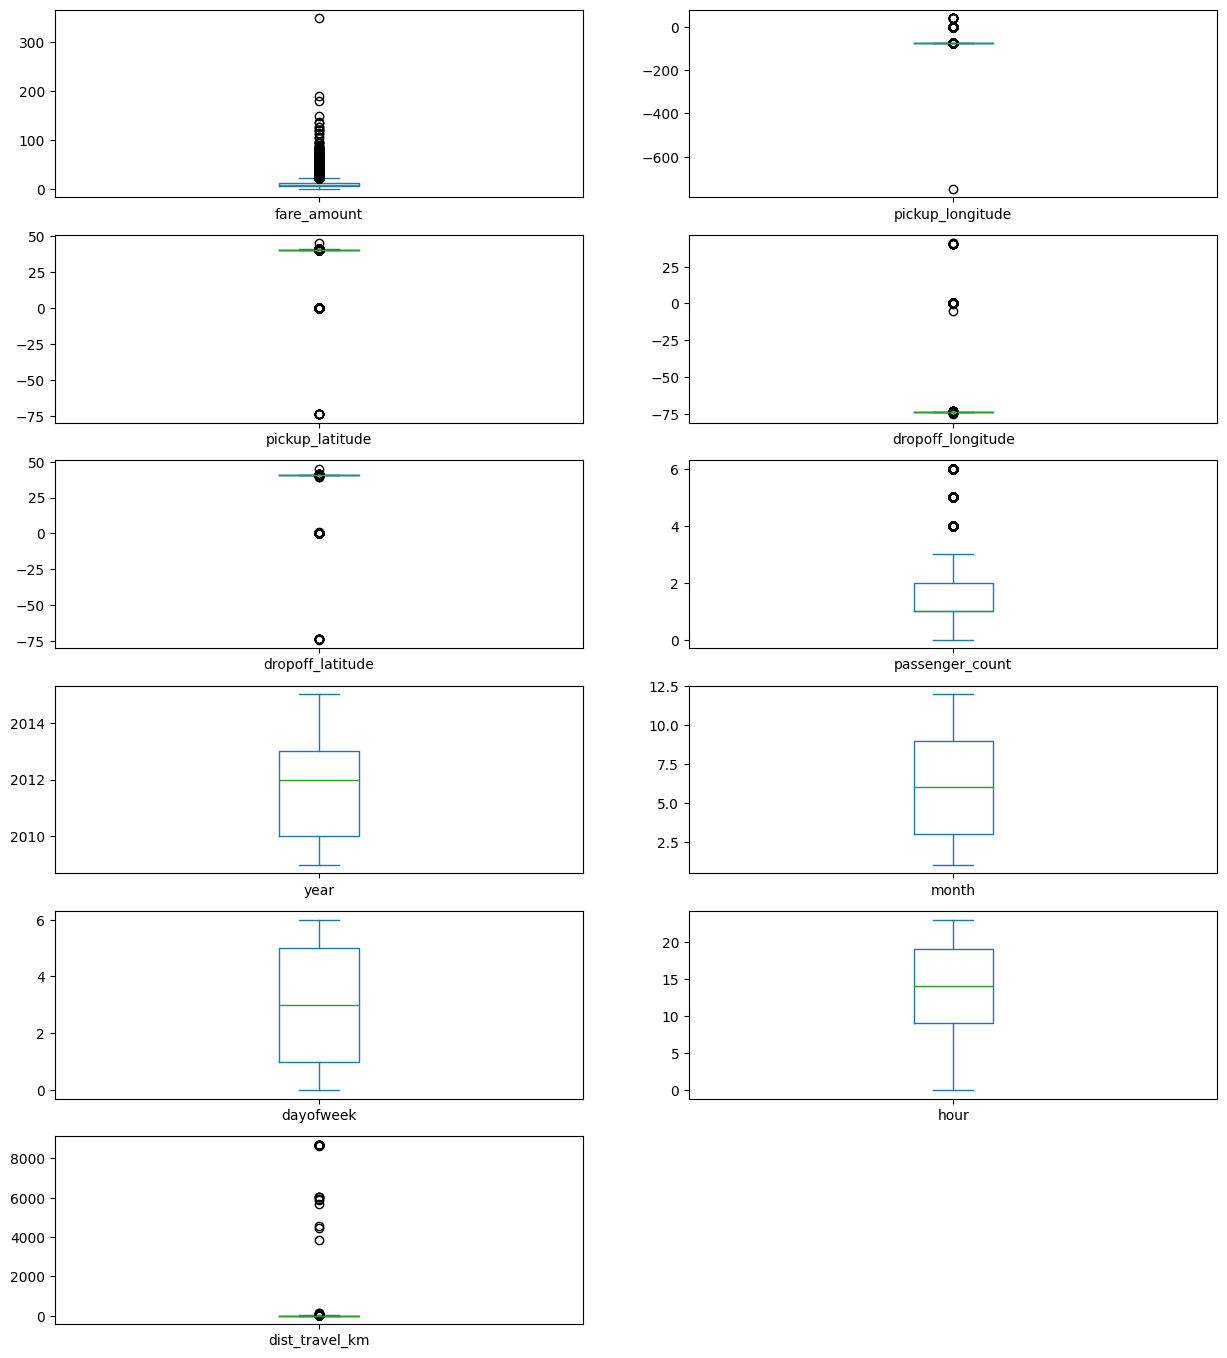

In [ ]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [ ]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    interQuantileRange = Q3 - Q1
    lowerLimit = Q1 - 1.5*interQuantileRange
    upperLimit = Q3 + 1.5*interQuantileRange
    df[col] = np.clip(df1[col], lowerLimit, upperLimit)
    return df1

def treat_all_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_all_outliers(df, df.iloc[: , 0::])

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
year,"Axes(0.125,0.448049;0.352273x0.0939024)"
month,"Axes(0.547727,0.448049;0.352273x0.0939024)"
dayofweek,"Axes(0.125,0.335366;0.352273x0.0939024)"
hour,"Axes(0.547727,0.335366;0.352273x0.0939024)"


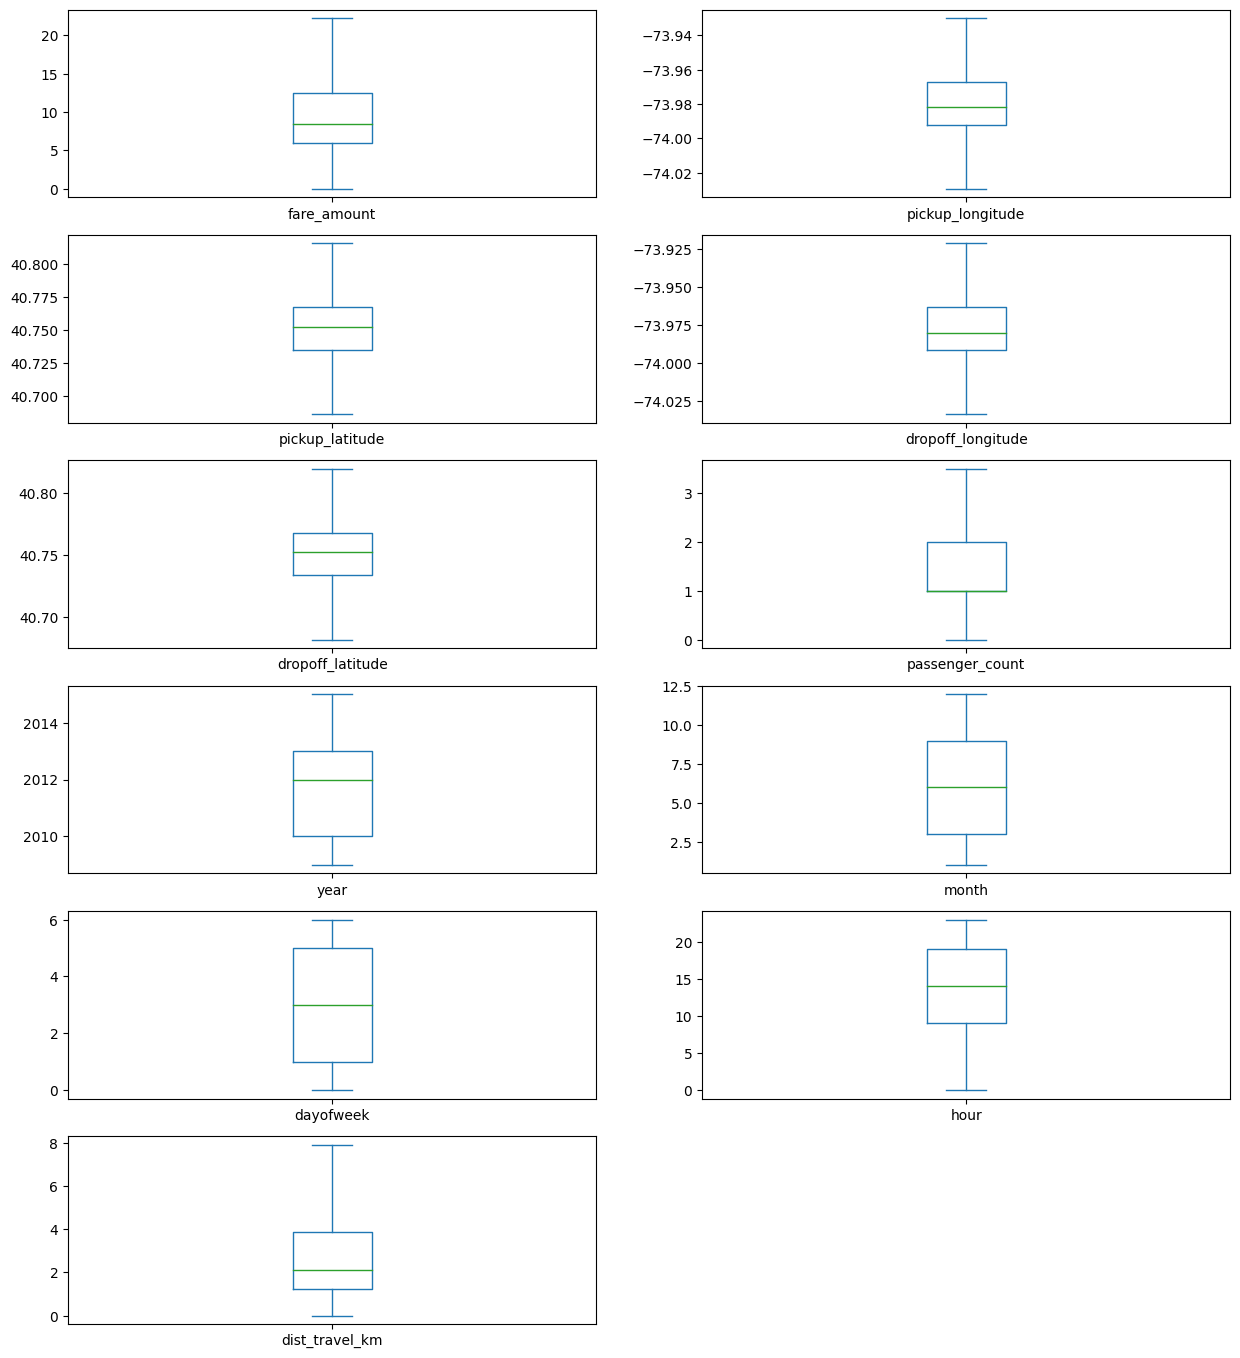

In [ ]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [ ]:
df= df.loc[(df.dist_travel_km>= 1) | (df.dist_travel_km<= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (23541, 11)


In [ ]:
incorrect_coordinates= df.loc[(df.pickup_latitude> 90) |(df.pickup_latitude< -90) |
                              (df.dropoff_latitude> 90) |(df.dropoff_latitude< -90) |
                              (df.pickup_longitude> 180) |(df.pickup_longitude< -180) |
                              (df.dropoff_longitude> 180) |(df.dropoff_longitude< -180) ]

df.drop(incorrect_coordinates, inplace = True, errors='ignore')

In [ ]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,4,8,1.661683
4,16.0,-73.930059,40.744085,-73.973082,40.761247,3.5,2014,8,3,17,4.475450


In [ ]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
fare_amount,1.000000,0.152107,-0.110510,0.224991,-0.128565,0.013683,0.150199,0.031163,0.019310,-0.007884,0.844439
pickup_longitude,0.152107,1.000000,0.272560,0.431014,0.089193,-0.008980,0.005809,0.003208,-0.034530,0.013523,0.099107
pickup_latitude,-0.110510,0.272560,1.000000,0.055196,0.519160,-0.009268,-0.006418,0.004955,-0.046004,0.032660,-0.041418
dropoff_longitude,0.224991,0.431014,0.055196,1.000000,0.252544,-0.011850,0.013526,0.008863,-0.007070,-0.054518,0.190981
dropoff_latitude,-0.128565,0.089193,0.519160,0.252544,1.000000,-0.008566,0.000913,0.005617,-0.034852,0.019756,-0.038747
passenger_count,0.013683,-0.008980,-0.009268,-0.011850,-0.008566,1.000000,-0.012208,0.011987,0.042202,0.025342,0.015095
year,0.150199,0.005809,-0.006418,0.013526,0.000913,-0.012208,1.000000,-0.128933,0.000712,-0.002220,0.035060
month,0.031163,0.003208,0.004955,0.008863,0.005617,0.011987,-0.128933,1.000000,-0.005362,-0.003569,0.010936
dayofweek,0.019310,-0.034530,-0.046004,-0.007070,-0.034852,0.042202,0.000712,-0.005362,1.000000,-0.091302,0.034133
hour,-0.007884,0.013523,0.032660,-0.054518,0.019756,0.025342,-0.002220,-0.003569,-0.091302,1.000000,-0.026491


<Axes: >

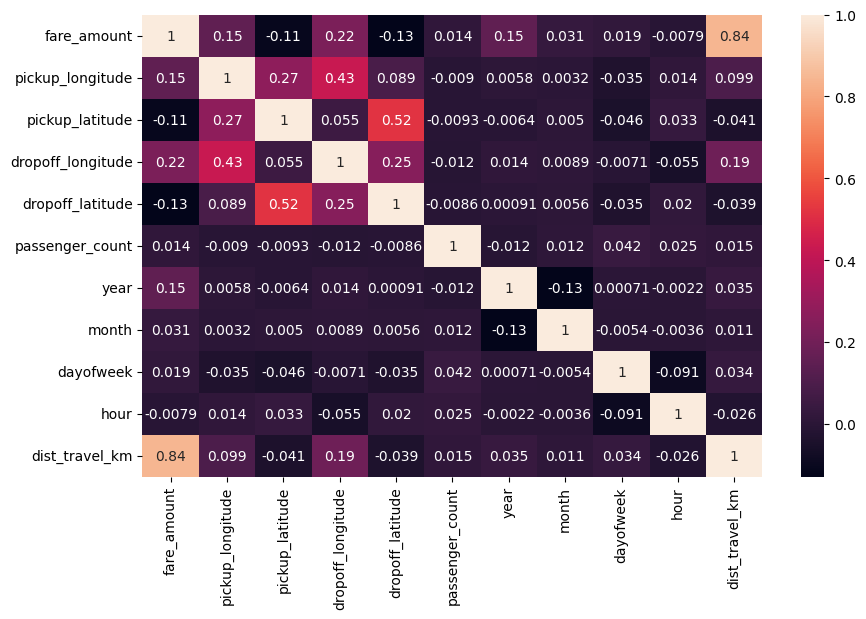

In [ ]:
fig,axis= plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(),annot= True)

In [ ]:
x= df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)
print(y_pred)

[ 8.13437357  5.83352203  7.79303355 ...  6.96241245  6.77993028
 14.95667555]


In [ ]:
y_test

,fare_amount
2801,6.9
1426,6.1
17970,8.9
20136,4.5
22229,15.5
...,...
2983,3.0
18692,3.7
15507,8.0
11220,4.9


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.7464616397733255

In [ ]:
MSE= mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE)
RMSE

2.7555188422708348

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [ ]:
r2_score(y_test,ridge_pred)

0.7466801480336165

In [ ]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [ ]:
r2_score(y_test, lasso_pred)

0.7102917970966512

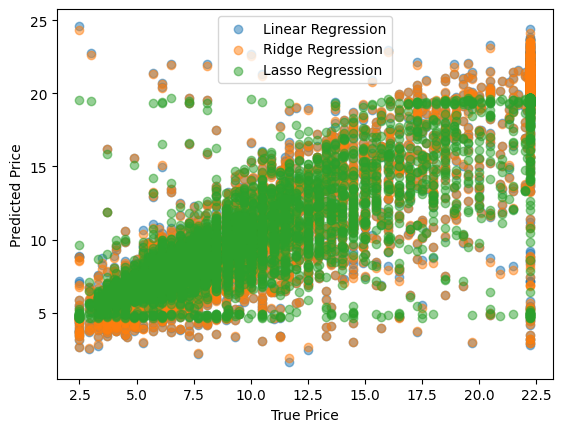

In [ ]:
plt.scatter(y_test, prediction, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=0.5)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()